In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 128)      

In [ ]:
batch_size = 32
train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Project/Data/CNNData/Train',
        target_size=(256, 256),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/Project/Data/CNNData/Test',
        target_size=(256, 256),
        batch_size=batch_size,
        class_mode='binary')

save_callback = ModelCheckpoint('CNN_Models_Simple_save_best_epoch.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='min', period=10)

class CustomModelCheckpoint(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # logs is a dictionary
        if epoch % 10 == 0:
          #print(f"epoch: {epoch}, train_acc: {logs['acc']}, valid_acc: {logs['val_acc']}")
          #if logs['val_acc'] > logs['acc']: # your custom condition
          self.model.save('CNN_Models_Simple_' + str(epoch) + '_model.h5')

save_per_epoch = CustomModelCheckpoint()

history = model.fit_generator(
        train_generator,
        steps_per_epoch=113,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=13,
        callbacks = [save_callback, save_per_epoch])

Found 3599 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/50
113/113 [==============================] - 76s 672ms/step - loss: 0.4541 - acc: 0.8302 - val_loss: 0.4233 - val_acc: 0.8225
Epoch 2/50
113/113 [==============================] - 73s 646ms/step - loss: 0.3977 - acc: 0.8334 - val_loss: 0.2915 - val_acc: 0.8225
Epoch 3/50
113/113 [==============================] - 73s 643ms/step - loss: 0.2896 - acc: 0.8633 - val_loss: 0.1970 - val_acc: 0.9300
Epoch 4/50
113/113 [==============================] - 72s 637ms/step - loss: 0.2306 - acc: 0.8896 - val_loss: 0.2009 - val_acc: 0.9125
Epoch 5/50
113/113 [==============================] - 71s 629ms/step - loss: 0.1961 - acc: 0.9145 - val_loss: 0.1991 - val_acc: 0.9175
Epoch 6/50
113/113 [==============================] - 71s 631ms/step - loss: 0.1922 - acc: 0.9136 - val_loss: 0.1941 - val_acc: 0.9200
Epoch 7/50
113/113 [==============================] - 71s 627ms/step - loss: 0.1662 - acc: 0.9286 - val_los

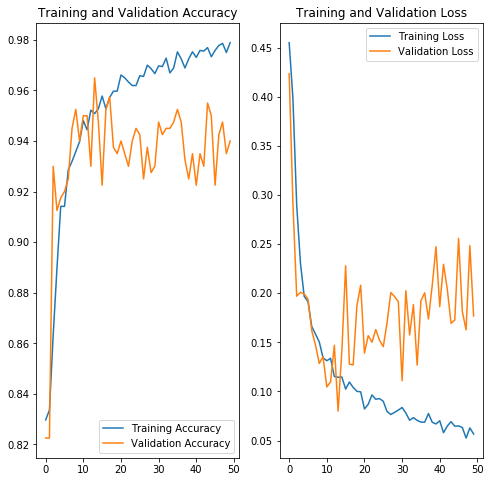

In [ ]:
epochs = 50
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from keras.models import load_model
import cv2
import numpy as np
import os

images = os.listdir('/content/drive/My Drive/Project/Data/CNNData/Train/PointLess')

#model1 = load_model('CNN_Models_Simple_10_model.h5')

for img_path in images:
  img = cv2.imread('/content/drive/My Drive/Project/Data/CNNData/Train/PointLess/' + img_path)
  img = cv2.resize(img, (256,256))
  img = np.reshape(img, (1,256,256,3))
  classes = model.predict_classes(img)
  print(classes, img_path)

[1] 4 (12).jpg
[1] 23 (47).jpg
[0] 41 (26).jpg
[1] 15 (10).jpg
[1] 5 (14).jpg
[1] 12 (43).jpg
[1] 9 (2).jpg
[0] 19 (37).jpg
[1] 39 (21).jpg
[1] 36 (19).jpg
[1] 33 (41).jpg
[1] 26 (24).jpg
[1] 4 (13).jpg
[1] 5 (26).jpg
[0] 18 (10).jpg
[0] 27 (34).jpg
[1] 33 (21).jpg
[1] 22 (64).jpg
[1] 17 (48).jpg
[1] 12 (48).jpg
[0] 2 (43).jpg
[1] 36 (26).jpg
[1] 1 (18).jpg
[0] 35 (51).jpg
[1] 7 (4).jpg
[1] 8 (34).jpg
[0] 14 (5).jpg
[1] 12 (25).jpg
[1] 29 (4).jpg
[0] 14 (24).jpg
[1] 44 (56).jpg
[1] 4 (69).jpg
[1] 23 (32).jpg
[0] 30 (15).jpg
[1] 39 (53).jpg
[1] 13 (48).jpg
[1] 17 (59).jpg
[0] 2 (52).jpg
[0] 14 (7).jpg
[0] 18 (15).jpg
[0] 45 (29).jpg
[1] 11 (8).jpg
[0] 32 (12).jpg
[1] 1 (26).jpg
[1] 26 (51).jpg
[1] 34 (49).jpg
[1] 30 (62).jpg
[0] 27 (9).jpg
[0] 45 (12).jpg
[1] 40 (45).jpg
[0] 18 (68).jpg
[0] 2 (25).jpg
[1] 25 (42).jpg
[1] 36 (12).jpg
[1] 31 (35).jpg
[1] 36 (56).jpg
[0] 19 (23).jpg
[1] 23 (42).jpg
[0] 19 (59).jpg
[1] 4 (39).jpg
[1] 17 (22).jpg
[1] 9 (34).jpg
[1] 13 (3).jpg
[0] 27 (20).jpg